#### Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

Ans.

Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting and handle multicollinearity (i.e., when predictor variables are highly correlated).

Ordinary Least Squares (OLS) Regression
OLS estimates the coefficients β by minimizing the sum of squared residuals:  
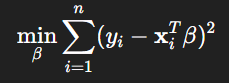  

- It assumes predictors are not highly correlated.
- When multicollinearity exists, OLS coefficients can become very large and unstable.
- It focuses purely on minimizing prediction error without penalizing model complexity.

---

#### Q2. What are the assumptions of Ridge Regression?

Ans.

Ridge Regression, like other forms of linear regression, makes several key assumptions. These assumptions help ensure that the model estimates are valid and interpretable. Here's a breakdown of the main assumptions:

1.Linearity
- The relationship between the independent variables (features) and the dependent variable (target) is assumed to be linear. Ridge regression still models a linear combination of predictors, even though it includes regularization.

2.Independence of Errors
- The residuals (errors) should be independent. This means the error terms should not be correlated with each other (no autocorrelation). This is especially important in time series data.

3.Homoscedasticity (Constant Variance of Errors)
- The residuals should have constant variance at every level of the independent variables. In other words, the spread of the residuals should be roughly the same across all values of the predicted variable.

4.Multicollinearity
- Ridge regression is specifically designed to handle multicollinearity (when predictors are highly correlated). Unlike ordinary least squares (OLS) regression, ridge can still perform well in the presence of multicollinearity by adding a penalty term that shrinks the coefficients.

5.Normality of Errors (optional, for inference)
- The errors should be normally distributed only if you want to construct confidence intervals or perform hypothesis testing. For prediction purposes, this assumption is not strictly necessary.

6.No Perfect Collinearity
- Although ridge can handle high multicollinearity, perfect multicollinearity (when one variable is a perfect linear combination of others) still causes problems, as the matrix inversion in solving the normal equations would be undefined. Ridge avoids singularities by adding a penalty term, but exact collinearity is still problematic in practice.

---

#### Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

Ans.

The tuning parameter λ (also known as alpha in some libraries) in Ridge Regression controls the strength of the L2 regularization penalty. Selecting an appropriate value for λ is crucial for model performance, and it’s typically done using data-driven techniques. Here are the common methods:

**Cross-Validation (Most Common)**  
a. k-Fold Cross-Validation  
  - Split the data into k subsets (folds).  
  - For a grid of candidate λ values:  
    - Fit a Ridge Regression model on 𝑘−1 folds.  
    - Evaluate it on the remaining fold.  
    - Repeat for all folds and average the error (e.g., MSE).  

- Select the λ with the lowest average validation error.

b. Leave-One-Out Cross-Validation (LOOCV)
  - A special case of k-fold where k=n (number of data points).
  - More computationally expensive, but can be more accurate for small datasets.

---

#### Q4. Can Ridge Regression be used for feature selection? If yes, how?

Ans.

Ridge Regression is not typically used for feature selection in the traditional sense — it does not set any coefficients exactly to zero. Instead, it shrinks them towards zero depending on the strength of regularization (i.e., the value of λ).

---

#### Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

Ans.

Ridge Regression performs very well in the presence of multicollinearity, and in fact, one of its primary advantages is its ability to handle highly correlated predictors effectively.

**What is Multicollinearity**  
- Multicollinearity occurs when two or more independent variables in a regression model are highly linearly correlated, making it difficult to estimate their individual effects accurately. In ordinary least squares (OLS) regression, this causes:
  - Large variances in coefficient estimates
  - Unstable coefficients that can change drastically with slight changes in the data
  - Overfitting and poor generalization

**How Ridge Regression Handles Multicollinearity:**  
1. Adds a Penalty to the Loss Function  
2. Reduces Variance by Shrinking Coefficients  
3. Makes the Matrix Inversion More Stable  

**Practical Outcomes:**
- Improved prediction accuracy in the presence of collinearity.
- More stable and interpretable coefficients, though still not sparse.
- No feature removal, just shrinking — so it's not suitable if you want a simplified model with fewer features.

---

#### Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Ans.

Yes, Ridge Regression can handle both categorical and continuous independent variables, but categorical variables must be properly encoded before fitting the model. Ridge itself doesn't distinguish between variable types—it just operates on numerical input.

**Handling Continuous Variables**
- No special treatment needed.
- Just scale (standardize) them before fitting the model to ensure the regularization penalty affects all features equally.

**Handling Categorical Variables**  
1.One-Hot Encoding (Most Common)
  - Convert each category into a separate binary column (0/1).  

2.Ordinal Encoding (Only if Categories Have Order)
  - Assign integers to categories.
  - Use this only when the order is meaningful (e.g., “low,” “medium,” “high”).

3.Other Advanced Encodings (for many categories)
  - Target Encoding or Embedding-based methods (not commonly used with Ridge, more for tree-based or deep models).


---

#### Q7. How do you interpret the coefficients of Ridge Regression?

Ans.

Interpreting the coefficients of Ridge Regression is similar to interpreting those in ordinary least squares (OLS) regression, but with important caveats due to the regularization.  

**General Interpretation**  
- Each coefficient in Ridge Regression represents the change in the predicted output for a one-unit increase in the corresponding feature, assuming all other features are held constant — just like in OLS.
- However, due to the L2 penalty, coefficients are shrunk toward zero, which affects how we interpret them:

**Key Differences from OLS Interpretation:**  

1.Shrinkage Effect
- Ridge penalizes large coefficients, so even strong predictors might have smaller coefficients.
- Coefficient size is influenced not just by feature relevance, but also by the presence of multicollinearity and the regularization strength λ.

2.Relative, Not Absolute Importance
- The coefficients indicate relative importance but should not be interpreted in absolute terms, especially if the predictors are correlated.

3.Not Zeroed Out
- Unlike Lasso, Ridge never sets coefficients to exactly zero, so all features contribute to the prediction (even weak ones).

**Best Practices for Interpretation:**  

1.Standardize Features Before Fitting
- This ensures coefficients are on the same scale and allows you to compare their relative importance.

2.Inspect Magnitudes Carefully
- Larger absolute coefficients suggest more influence on predictions, but only after scaling.

3.Use Regularization Path
- Visualize how coefficients evolve as λ increases to understand feature sensitivity.

---

#### Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Ans.

Yes, Ridge Regression can be used for time-series data analysis, but with careful preprocessing and modeling considerations. Ridge doesn’t inherently understand time — it’s a regularized linear model — so you must structure the data appropriately to account for temporal dependencies.

**How to Use Ridge Regression for Time Series**  

1.Transform Time-Series Data into a Supervised Learning Format
- Use lag features to capture temporal relationships:

2.Split Data Respectfully (No Random Shuffling)
- Use time-based train-test splits to avoid data leakage.
- Example: train on data from Jan–Nov, test on Dec.

3.Standardize Features
- Apply scaling after creating lag features (e.g., with StandardScaler), and fit the scaler on training data only.